In [3]:
import torch

from transformers import FlaubertForSequenceClassification, FlaubertTokenizer

from src.dataset import FactsOrAnalysisDS_BERT
from src.models import FoaFlauBERTlinear
from src.train import trainIters

device = torch.device("cpu")
flaubert_seq = FlaubertForSequenceClassification.from_pretrained('flaubert-base-uncased',num_labels=1)
tokeniser = FlaubertTokenizer.from_pretrained('flaubert-base-uncased')


In [2]:
ds = "data/dataset_sentences_facts_non_facts20200311.pickle"
ds = FactsOrAnalysisDS_BERT(ds,tokeniser,n_read=2048*2)
tr = int(len(ds)*.70)
vd = int(len(ds)*.10)
ts = len(ds) - tr - vd
train_ds, valid_ds, test_ds = torch.utils.data.random_split(ds,[tr,vd,ts])

CUDA is available!


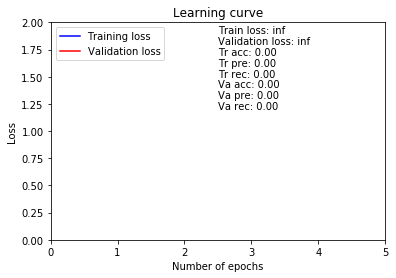

/home/andres/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andres/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


KeyboardInterrupt: 

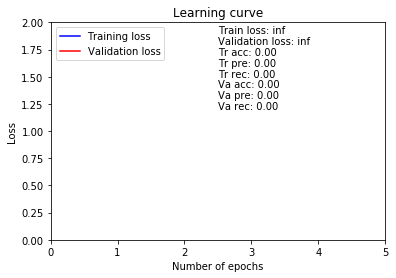

In [4]:
model=FoaFlauBERTlinear(flaubert_seq).to(device)

## CONFIG
batch_size=16
n_epochs=5
learning_rate=1e-4
weight_decay=0
clip=.2
## /CONFIG

t,v=trainIters(model,
               train_ds,
               valid_ds,
               batch_size,
               n_epochs,
               learning_rate,
               weight_decay,
               clip,
               device)